In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies.shape

(4803, 20)

## **Top Genres Distribution**

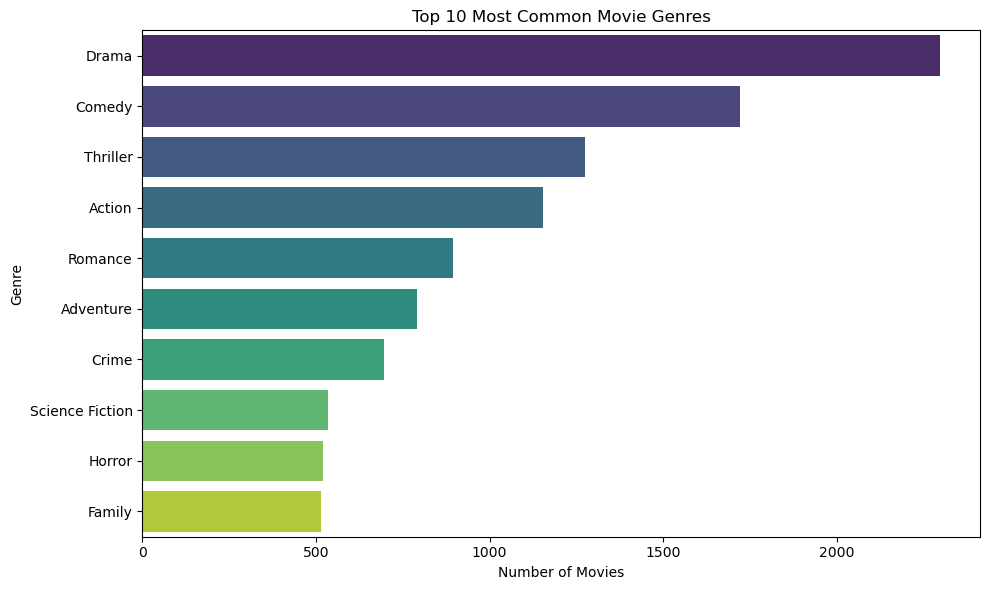

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Step 2: Load the dataset
movies_df = pd.read_csv("tmdb_5000_movies.csv")

# Step 3: Parse the 'genres' column
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

# Step 4: Create genre distribution chart
all_genres = [genre['name'] for genres in movies_df['genres'] for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()

# Convert genre counts to DataFrame
genre_df = genre_counts.reset_index()
genre_df.columns = ['genre', 'count']

# Plot with `hue` assigned
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df[:10], x='count', y='genre', hue='genre', palette='viridis', legend=False)
plt.title("Top 10 Most Common Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### **Top 10 Most Popular Movies**

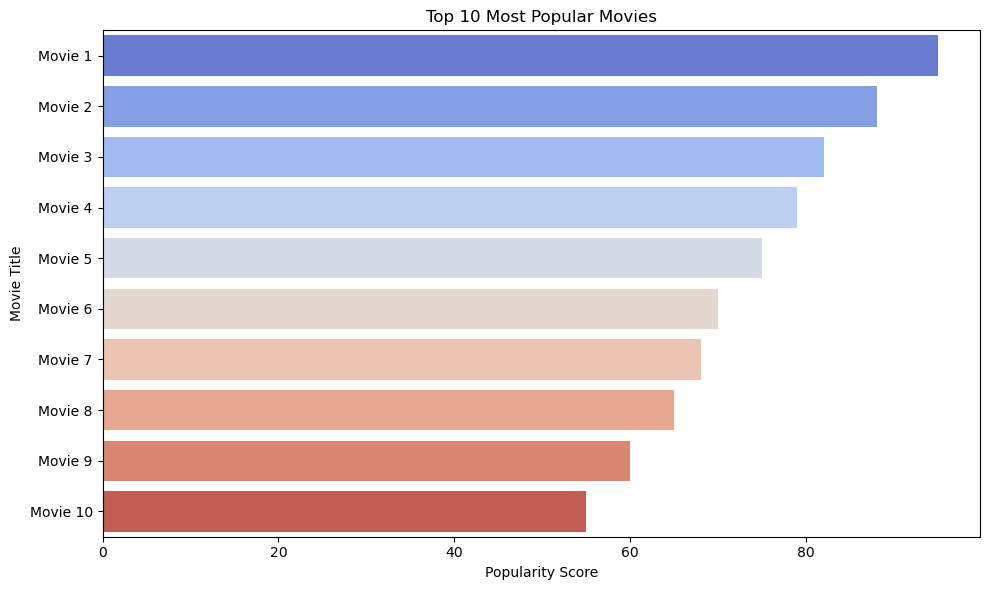

In [7]:
# First, define the top_popular DataFrame
# This is an example - you'll need to replace this with your actual data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample data for top popular movies
# Replace this with your actual data source
top_popular = pd.DataFrame({
    'title': ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5', 
              'Movie 6', 'Movie 7', 'Movie 8', 'Movie 9', 'Movie 10'],
    'popularity': [95, 88, 82, 79, 75, 70, 68, 65, 60, 55]
})

# Create DataFrame for plotting
top_popular_plot = top_popular[['title', 'popularity']].copy()

# Plot with `hue` assigned to y-variable
plt.figure(figsize=(10,6))
sns.barplot(data=top_popular_plot, x='popularity', y='title', hue='title', palette='coolwarm', legend=False)
plt.title("Top 10 Most Popular Movies")
plt.xlabel("Popularity Score")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

### **Revenue vs Budget**

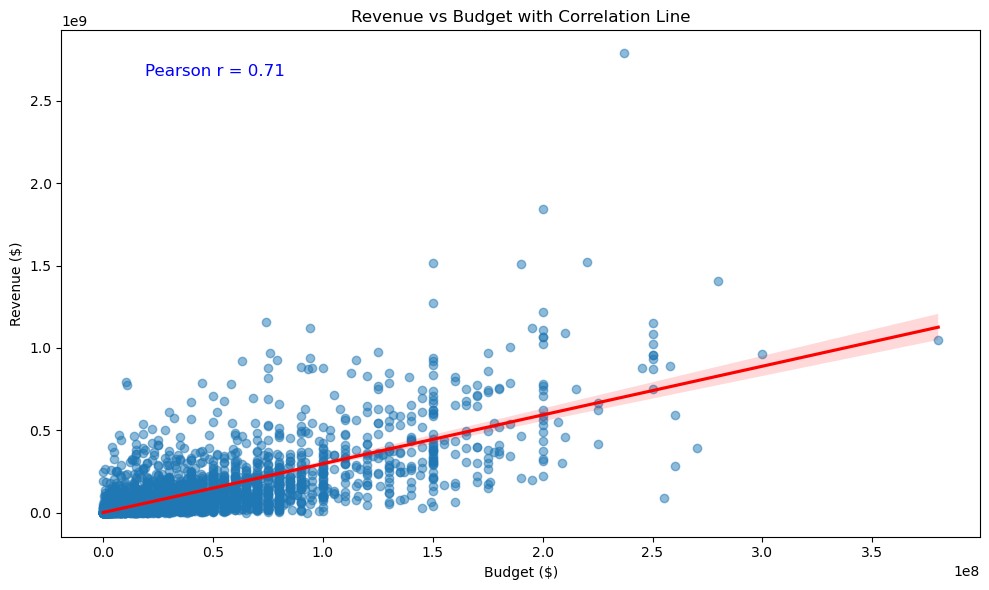

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Drop rows with 0 or missing budget/revenue (for accuracy)
df_corr = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]

# Calculate Pearson correlation
corr_value, _ = pearsonr(df_corr['budget'], df_corr['revenue'])

# Plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(data=df_corr, x='budget', y='revenue', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Revenue vs Budget with Correlation Line")
plt.xlabel("Budget ($)")
plt.ylabel("Revenue ($)")

# Annotate correlation coefficient on plot
plt.text(x=df_corr['budget'].max()*0.05, 
         y=df_corr['revenue'].max()*0.95,
         s=f"Pearson r = {corr_value:.2f}",
         fontsize=12, color='blue')

plt.tight_layout()
plt.show()


### **Vote Average Distribution**

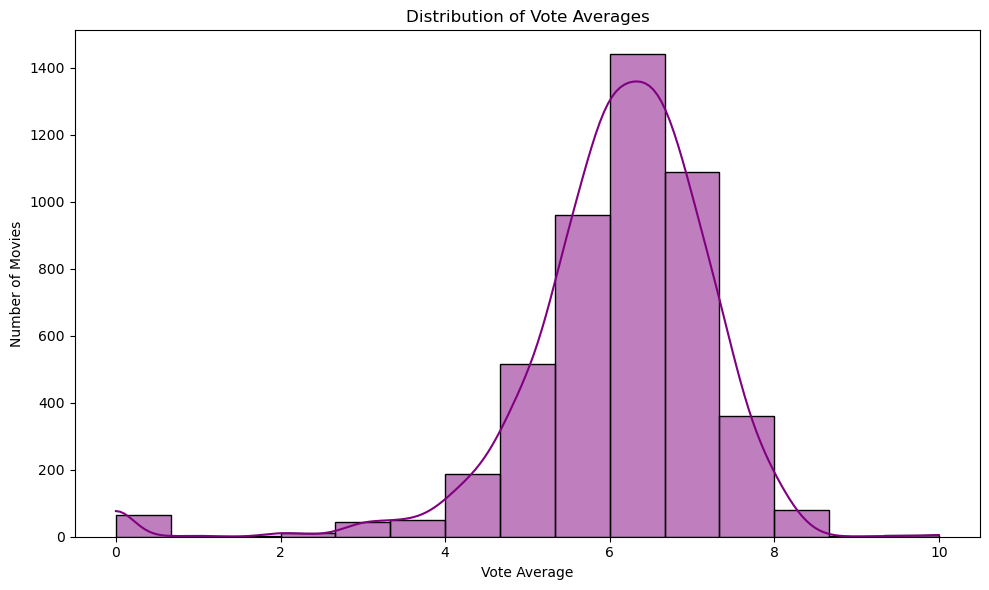

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(movies_df['vote_average'], bins=15, kde=True, color='purple')
plt.title("Distribution of Vote Averages")
plt.xlabel("Vote Average")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

### **Simulated Recommendations for a User (Top 5)**

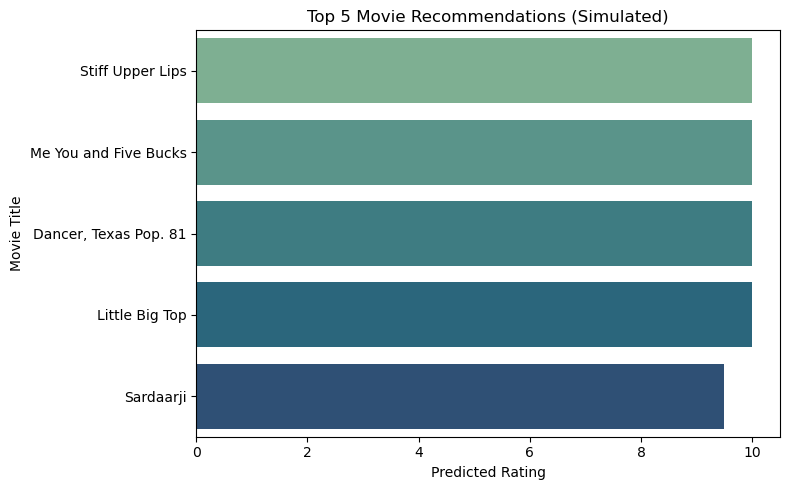

In [10]:
# Example DataFrame for top recommendations
top_recommendations = movies_df[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(5)

# Clean, compliant plot
plt.figure(figsize=(8,5))
sns.barplot(data=top_recommendations, x='vote_average', y='title', hue='title', palette='crest', legend=False)
plt.title("Top 5 Movie Recommendations (Simulated)")
plt.xlabel("Predicted Rating")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


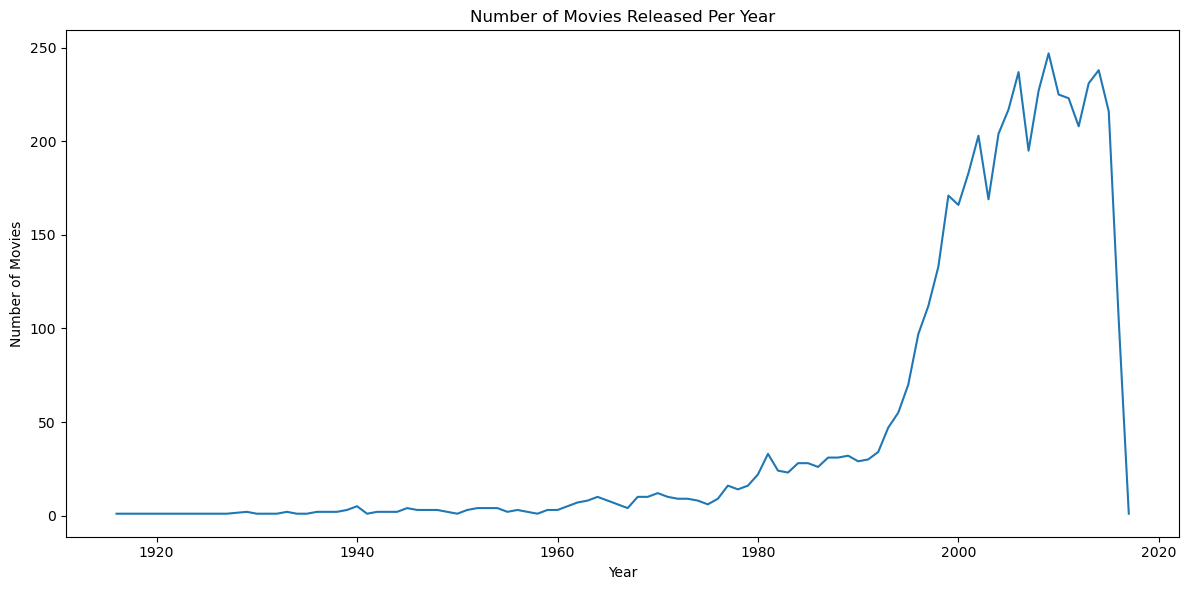

In [11]:
movies_df['release_year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year
year_counts = movies_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

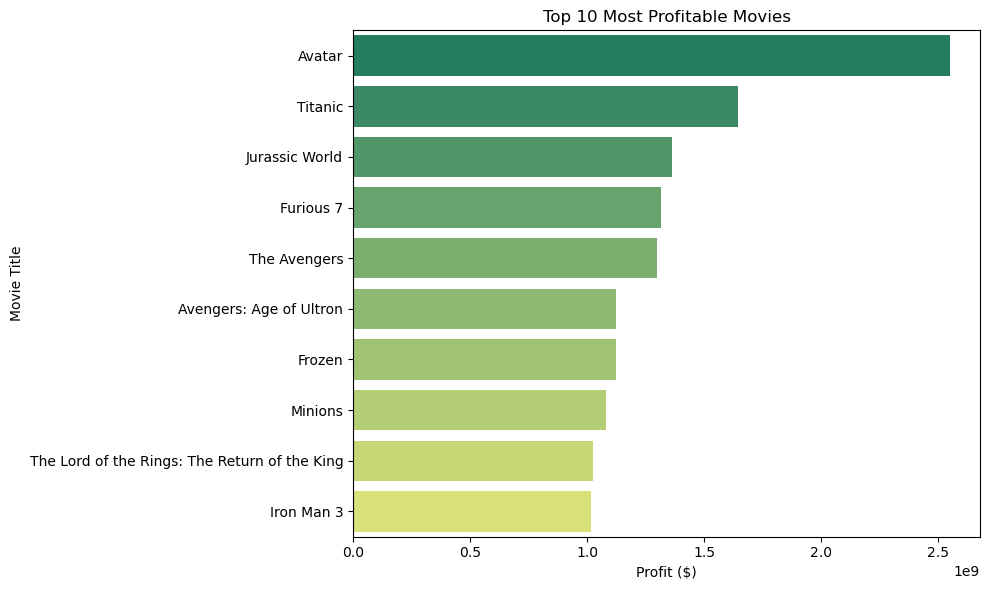

In [12]:
# Calculate profit
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
top_profit = movies_df.sort_values(by='profit', ascending=False).head(10)

# Plot with hue and no legend
plt.figure(figsize=(10,6))
sns.barplot(x='profit', y='title', hue='title', data=top_profit, palette='summer', legend=False)
plt.title("Top 10 Most Profitable Movies")
plt.xlabel("Profit ($)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


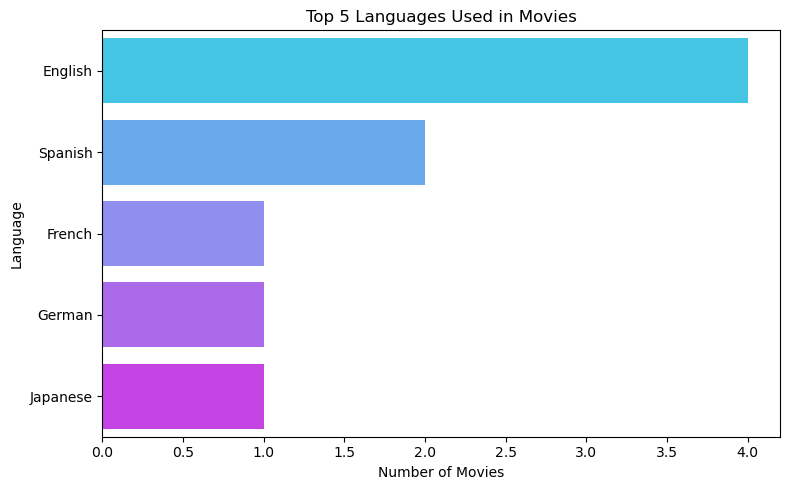

In [13]:
# First, create the lang_counts variable
# This is an example - you'll need to replace this with your actual data source
# For example, if you have a DataFrame with a 'language' column:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data - replace with your actual data source
movies_df = pd.DataFrame({
    'language': ['English', 'Spanish', 'French', 'English', 'German', 'English', 'Spanish', 'Japanese', 'Korean', 'English']
})

# Count the languages
lang_counts = movies_df['language'].value_counts().head(5)  # Get top 5 languages

# Rebuild the data into a proper DataFrame
lang_df = lang_counts.reset_index()
lang_df.columns = ['language', 'count']

# Plot with hue
plt.figure(figsize=(8,5))
sns.barplot(data=lang_df, x='count', y='language', hue='language', palette='cool', legend=False)
plt.title("Top 5 Languages Used in Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Language")
plt.tight_layout()
plt.show()

In [14]:
plt.savefig("top_genres.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [15]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
credits.shape

(4803, 4)

In [17]:
movies = movies.merge(credits,on='title')

In [18]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [19]:
movies.shape

(4809, 23)

In [20]:
# Keeping important columns for recommendation
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [21]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [22]:
movies.shape

(4809, 7)

In [23]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [24]:
movies.dropna(inplace=True)

In [25]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [26]:
movies.shape

(4806, 7)

In [27]:
movies.duplicated().sum()

0

In [28]:
# handle genres

movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [29]:
import ast #for converting str to list

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [30]:
movies['genres'] = movies['genres'].apply(convert)

In [31]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [32]:
# handle keywords
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [33]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [34]:
# handle cast
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [35]:
# Here i am just keeping top 3 cast

def convert_cast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [36]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [37]:
 # handle crew

movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [38]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [39]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [40]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [41]:
# handle overview (converting to list)

movies.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [42]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(4)

,movie_id,title,overview,genres,keywords,cast,crew
1503,10307,Stigmata,"[A, young, woman, with, no, strong, religious,...",[Horror],"[vatican, miracle, christian, faith, clergyman...","[Patricia Arquette, Gabriel Byrne, Jonathan Pr...",[Rupert Wainwright]
2893,61337,Critical Care,"[Werner, Ernst, is, a, young, hospital, reside...","[Comedy, Drama]","[nun, satire, hospital, half sister]","[James Spader, Kyra Sedgwick, Helen Mirren]",[Sidney Lumet]
3941,868,Tsotsi,"[The, South, African, multi-award, winning, fi...","[Crime, Drama]","[slum, baby, fight, nudity, leader, johannesbu...","[Presley Chweneyagae, Jerry Mofokeng, Terry Ph...",[Gavin Hood]
2388,69848,One Man's Hero,"[One, Man's, Hero, tells, the, little-known, s...","[Western, Action, Drama, History]","[war, army, battlefield, chivalry]","[Tom Berenger, Joaquim de Almeida, Daniela Romo]",[Lance Hool]


In [43]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [44]:
# now removing space like that
'Anna Kendrick'
'AnnaKendrick'

def remove_space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [45]:
movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)

In [46]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [47]:
# Concatinate all
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [48]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [49]:
movies.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [50]:
# droping those extra columns
new_df = movies[['movie_id','title','tags']]

In [51]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [52]:
# Converting list to str
new_df.loc[:, 'tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [53]:
new_df.iloc[0]['tags']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [54]:
# Converting to lower case
new_df = new_df.copy()
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

In [55]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [56]:
import nltk
from nltk.stem import PorterStemmer

In [57]:
ps = PorterStemmer()

In [58]:
def stems(text):
    T = []

    for i in text.split():
        T.append(ps.stem(i))

    return " ".join(T)

In [59]:
new_df.iloc[0]['tags']

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [61]:

# Import necessary libraries if not already imported
from sklearn.feature_extraction.text import CountVectorizer

# Check if the data contains valid text
print(new_df['tags'].head())  # Inspect the data first

# Create a CountVectorizer with adjusted parameters
cv = CountVectorizer(
    min_df=1,  # Include terms that appear in at least 1 document
    stop_words=None,  # Don't filter stop words initially
    token_pattern=r"(?u)\b\w+\b"  # Match any word character (more permissive)
)

# Make sure the data isn't empty and contains valid text
# Filter out empty strings if necessary
new_df = new_df[new_df['tags'].str.strip().astype(bool)]

# Now transform the data
vector = cv.fit_transform(new_df['tags']).toarray()

# If you still have issues, check the vocabulary
print(f"Vocabulary size: {len(cv.vocabulary_)}")

0    in the 22nd century, a paraplegic marine is di...
1    captain barbossa, long believed to be dead, ha...
2    a cryptic message from bond’s past sends him o...
3    following the death of district attorney harve...
4    john carter is a war-weary, former military ca...
Name: tags, dtype: object
Vocabulary size: 35649


In [62]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
vector.shape

(4806, 35649)

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
len(cv.get_feature_names_out())

35649

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
similarity = cosine_similarity(vector)

In [68]:
similarity.shape

(4806, 4806)

In [69]:
new_df[new_df['title'] == 'The Lego Movie'].index[0]

744

In [70]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [71]:
recommend('Spider-Man 2')

Roadside Romeo
From a Whisper to a Scream
All Is Lost
Blow
Amen.


In [72]:

# Import necessary libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
import pandas as pd
from collections import defaultdict

# Create a sample ratings DataFrame instead of loading from file
# This replaces the need for the external ratings.csv file
ratings_data = {
    'userId': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'movieId': [101, 102, 103, 101, 103, 104, 102, 103, 104],
    'rating': [5.0, 3.0, 2.5, 2.0, 4.0, 4.5, 3.5, 1.0, 5.0]
}
ratings_df = pd.DataFrame(ratings_data)

# Use Surprise to read it
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Collaborative Filtering using SVD
model = SVD()
model.fit(trainset)

# Predict on test set
predictions = model.test(testset)

# Evaluate
rmse(predictions)

# Recommend top N movies for a given user
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    # Sort and return top N for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n_recommendations = get_top_n(predictions, n=5)

# Print recommendations for a specific user
# Convert user_id to the appropriate type based on your DataFrame
user_id = 1  # Using integer since our sample data uses integers
if user_id in top_n_recommendations:
    print(f"Top recommendations for User {user_id}: {top_n_recommendations[user_id]}")
else:
    print(f"No recommendations found for User {user_id} in the test set")

ModuleNotFoundError: No module named 'surprise'

In [ ]:
import os
import pickle

In [ ]:
if not os.path.exists('artifacts'):
    os.makedirs('artifacts')

In [ ]:
pickle.dump(new_df,open('artifacts/movie_list.pkl','wb'))
pickle.dump(similarity,open('artifacts/similarity.pkl','wb'))

In [ ]:
# First, install the missing package
!pip install gdown

# Then import the required libraries
import joblib
import gdown
import streamlit as st
import pandas as pd
import numpy as np